In [283]:
%matplotlib inline

import _init_paths
from RenderAndCompare.geometry import BoundingBox, bbx_iou_overlap
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import random
from time import time

In [284]:
bbx = BoundingBox([100, 130], [400, 480])
bbx

BoundingBox(min=[ 100.  130.], max=[ 400.  480.], size=[ 300.  350.])

In [285]:
BoundingBox.fromRect(bbx.array())

BoundingBox(min=[ 100.  130.], max=[ 500.  610.], size=[ 400.  480.])

In [286]:
BoundingBox.fromArray(bbx.array())

BoundingBox(min=[ 100.  130.], max=[ 400.  480.], size=[ 300.  350.])

In [287]:
bbxA = BoundingBox([200, 300], [700, 900])
bbxB = BoundingBox([200, 300], [700, 600])
print "bbxA = {}".format(bbxA)
print "bbxB = {}".format(bbxB)

bbxA = BoundingBox(min=[ 200.  300.], max=[ 700.  900.], size=[ 500.  600.])
bbxB = BoundingBox(min=[ 200.  300.], max=[ 700.  600.], size=[ 500.  300.])


In [288]:
bbx_iou_overlap(bbxA.array(), bbxB.array())

0.5

In [325]:
def create_jittered_bbx(bbx, min_jittter_iou, num_bins=20):
    """returns a jittered bbx which has overlap > min_jittter_iou with input bbx"""
    assert 0 < min_jittter_iou <= 1.0
    assert bbx.size % 2 == 0
    ndim = bbx.size / 2
    
    bin_width = (1. - min_jittter_iou) / num_bins
    
    target_bin = np.random.randint(num_bins)
    target_iou_min = min_jittter_iou + target_bin * bin_width
    target_iou_max = target_iou_min + bin_width
    
    assert target_iou_min >= min_jittter_iou
    assert target_iou_max <= 1.
    
    wh = (np.asarray(bbx[ndim:]) - np.asarray(bbx[:ndim])) * (1.0 - target_iou_min)
    assert np.all(wh >= 0)
    while True:
        jitter = (np.random.normal(0.0, 0.4, (2, ndim)) * wh).reshape(2*ndim, )
        jittered_bbx = bbx + jitter
        jittered_bbx_wh = jittered_bbx[ndim:] - jittered_bbx[:ndim]
        if np.any(jittered_bbx_wh <= 0):
            continue
        
        actual_iou = bbx_iou_overlap(bbx, jittered_bbx)
        if target_iou_min <= actual_iou <= target_iou_max :
            return jittered_bbx

In [326]:
bbx = np.array([100, 200, 800, 500.])
num_of_trials = 10000

In [327]:
start = time()
for _ in xrange(num_of_trials):
    jittered_bbx = create_jittered_bbx(bbx, min_jittter_iou, 20)
end = time()
print "Took {}s".format(end - start)

Took 2.7976000309s


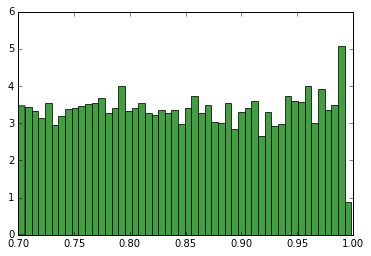

In [328]:
min_jittter_iou = 0.7

ious = []
jitterings = []
for _ in xrange(10000):
    jittered_bbx = create_jittered_bbx(bbx, min_jittter_iou, 20)
    iou = bbx_iou_overlap(bbx, jittered_bbx)
    assert iou >= min_jittter_iou
    ious.append(iou)
    jitterings.append(bbx - jittered_bbx)    
n, bins, patches = plt.hist(ious, 50, normed=1, facecolor='green', alpha=0.75)
plt.show()

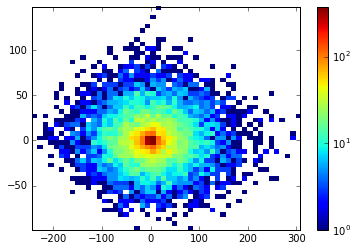

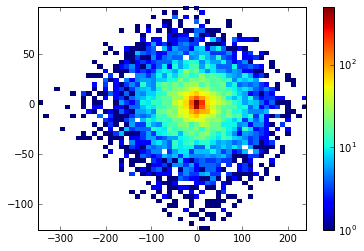

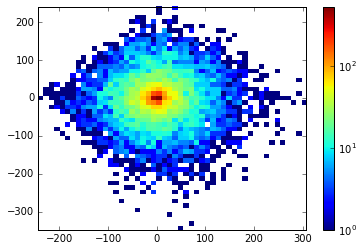

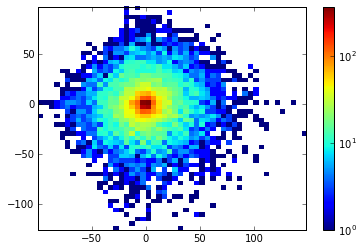

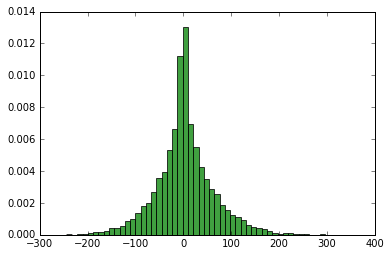

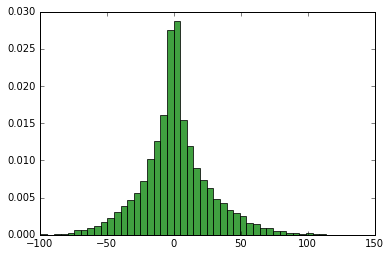

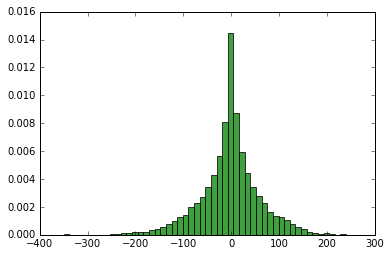

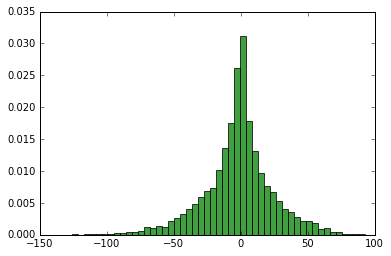

In [274]:
jitterings = np.array(jitterings)
plt.hist2d(jitterings[:, 0], jitterings[:, 1], bins=50, norm=LogNorm())
plt.colorbar()
plt.show()

plt.hist2d(jitterings[:, 2], jitterings[:, 3], bins=50, norm=LogNorm())
plt.colorbar()
plt.show()

plt.hist2d(jitterings[:, 0], jitterings[:, 2], bins=50, norm=LogNorm())
plt.colorbar()
plt.show()

plt.hist2d(jitterings[:, 1], jitterings[:, 3], bins=50, norm=LogNorm())
plt.colorbar()
plt.show()


n, bins, patches = plt.hist(jitterings[:, 0], 50, normed=1, facecolor='green', alpha=0.75)
plt.show()
n, bins, patches = plt.hist(jitterings[:, 1], 50, normed=1, facecolor='green', alpha=0.75)
plt.show()
n, bins, patches = plt.hist(jitterings[:, 2], 50, normed=1, facecolor='green', alpha=0.75)
plt.show()
n, bins, patches = plt.hist(jitterings[:, 3], 50, normed=1, facecolor='green', alpha=0.75)
plt.show()

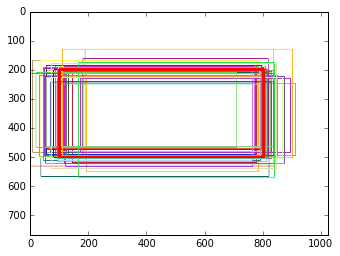

In [268]:
image = np.full((768, 1024, 3), 255, dtype=np.uint8)
for _ in xrange(50):
    jittered_bbx = create_jittered_bbx(bbx, 0.65)
    color = tuple(np.random.randint(0, 256, size=3))
    cv2.rectangle(image, tuple(jittered_bbx[:2].astype(np.float32)), tuple(jittered_bbx[2:].astype(np.float32)), color, 2)
cv2.rectangle(image, tuple(bbx[:2].astype(np.float32)), tuple(bbx[2:].astype(np.float32)), (255, 0, 0), 8)
plt.imshow(image)
plt.show()